## Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mse(B1, y, X, n):
    return sum((B1 * X - y) ** 2) / n

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

In [4]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)
print(f"y_hat = {a:.4f} + {b:.4f} * X")

y_hat = 444.1774 + 2.6205 * X


In [5]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
B = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"y_hat = {B[0][0]:.4f} * X")

y_hat = 5.8898 * X


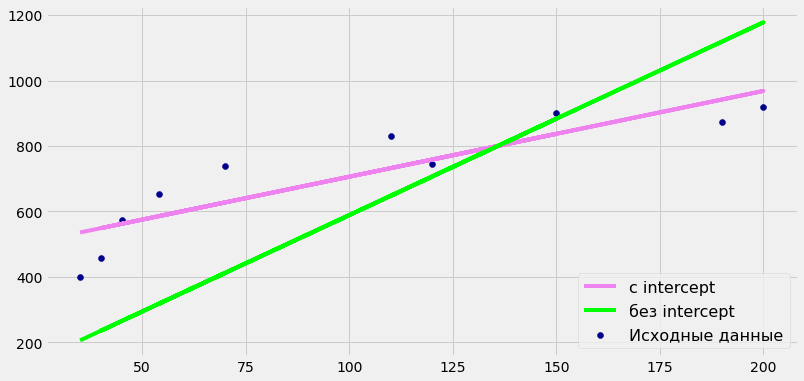

In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [12, 6]
plt.scatter(X, y, c='darkblue', label='Исходные данные')
plt.plot(X, a + b * X, c='violet', label='с intercept')
plt.plot(X, B[0][0] * X, c='lime', label='без intercept')
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)
plt.show()

### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [7]:
alfa = 1e-5
eps = alfa
b = 1
c = 0

for i in range(500):
    b -= alfa * (2 / n) * sum((b * X - y) * X)
    if i % 25 == 0 :
        current_mse = get_mse(b, y, X, n)
        print(f'{i}: {b[0]}, {current_mse[0]}')
        if np.abs(current_mse - c) < eps:
            print(f'Точность обеспечена')
            break
        c = current_mse
print(f"y_hat = {b[0]:.4f} * X")

0: 2.347302, 229405.42884192182
25: 5.888698938153246, 56516.87574284999
50: 5.8898200650966155, 56516.858415721144
75: 5.889820420020292, 56516.85841571943
Точность обеспечена
y_hat = 5.8898 * X


### 3 Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [8]:
a = 1
b = 1

for i in range(10000):
    a -= alfa ** (1/5) * (2 / n) * sum(a + b * X - y) 
    b -= alfa * (2 / n) * sum((a + b * X - y) * X)
    if i % 2500 == 0 :
        print(f'{i}: {a[0]}, {b[0]}')
        if np.abs(a + b - c) < eps:
            print(f'Точность обеспечена')
            break
        c = a + b
print(f"y_hat = {a[0]:.4f} + {b[0]:.4f} * X")

0: 122.5, 2.098872
2500: 444.17735732435875, 2.6205388824027724
5000: 444.17735732435875, 2.6205388824027724
Точность обеспечена
y_hat = 444.1774 + 2.6205 * X


### 4. Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики

#### Тема: EDA 
##### Данные: https://www.kaggle.com/c/geekbrains-competitive-data-analysis/data